# Intiliasation Phase

### Download libraries

In [ ]:
pip install seaborn -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1


### Importing Libraries

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import keras
import tensorflow as tf

from wordcloud import WordCloud
from tensorflow.keras import layers, models, losses, metrics, Sequential, optimizers


### Read Training Data CSV

In [ ]:
tweets_data= pd.read_csv('Tweets.csv')

tweets_data.sample(10)


,textID,text,selected_text,sentiment
18601,a52b93e88e,"not to sound preachery or anything, but my ip...",amazing.,positive
312,162a2510d2,DUSTBIN BABY ON AT 11.30 Cannot wait x,Cannot wait,positive
22623,417c0d34ef,So tired. Work today.,tired.,negative
16463,697c1dbb89,hasn`t shipped yet I won`t get over there un...,hasn`t shipped yet I won`t get over there unt...,neutral
20965,e25b77052a,ok2 g`nyt? Haha too early.,? Haha too early.,positive
2420,bf04914f83,so....i`m guessing no BGN?,so....i`m guessing no BGN?,neutral
27474,8f14bb2715,So I get up early and I feel good about the da...,I feel good ab,positive
7851,cda99b71e2,"thank you very much, I`m glad you like them!",glad,positive
10489,28cbeb931a,oficially mother`s day! Hug & kissa Ur mom tod...,good,positive
21517,3e8b248333,morning Newt...hope you are well!,..hope you are well!,positive


### Inspect Data Types

In [ ]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


### Ensure that there no null values in the data

In [ ]:
tweets_data.isnull().sum()

,0
textID,0
text,1
selected_text,1
sentiment,0


### Drop all Null data

In [ ]:
tweets_data = tweets_data.dropna()

tweets_data.isnull().sum()

,0
textID,0
text,0
selected_text,0
sentiment,0


### Check for duplicates in data

In [ ]:
tweets_data.duplicated().sum()

0

### Prepare data for training by dropping the unneccessary columns  

In [ ]:
tweets_data = tweets_data.drop(columns =['selected_text', 'textID'])

tweets_data.sample(10)

,text,sentiment
5795,Traffic jam outside of chicago. I feel very 'o...,positive
24613,Nice! That sounds great! Let me know when and...,positive
13156,Haha Happy Star Wars Day! 'May the 4th be wit...,positive
23408,waking up at 6 am? yuuup. still going out toni...,positive
3783,At Home,neutral
5923,I`m awake. Anybody else awake? Wish I lived in...,positive
14588,I just ate some burgers from Jack In The Box a...,neutral
5049,Nice sunny day,positive
8831,Probably the best birthday I`ve ever had. I go...,positive
20454,The bunny is longing for the hoodie she left i...,neutral


# Analysation Phase

### Check how many records per sentiment label

In [ ]:
tweets_data['sentiment'].value_counts()

,count
sentiment,
neutral,11117
positive,8582
negative,7781


Visualise the sentiment count information

<Axes: xlabel='sentiment', ylabel='count'>

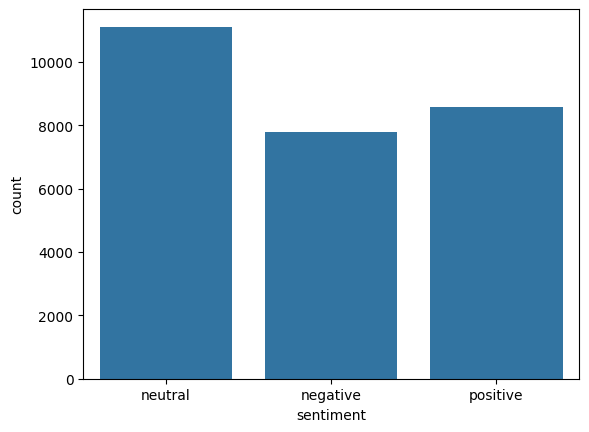

In [ ]:
# using the seaborn library to draw a bar chart

sns.countplot(tweets_data, x = 'sentiment')

### Check if the length of tweets differ widely

In [ ]:
tweets_data['word_count'] = tweets_data['text'].apply(lambda x: len(str(x).split(" ")))

tweets_data[['text', 'word_count']].sample(10)

,text,word_count
21999,Look at this ! http://twitpic.com/4wcqa I ca...,16
656,I don`t have the app that does it,9
23469,lol brandy and mr whiskers is on,8
23834,Wearing glasses gives me a headache.,6
24127,I need a bigger mp3 player... even if it pains...,14
21741,"iï¿½m boring - bad weather today, watchingn al...",15
8998,Want to get my hands dirty with FubuMVC. http:...,16
21231,http://twitpic.com/67nxe - Yeah..I`m bored XD ...,25
4569,im so tired of my responsabilities i wish i wa...,26
9493,_hay The Twitter Happiness score for sw00p is:...,19


### Check if the word length of tweets differ based on sentiment

In [ ]:
tweets_data.groupby("sentiment")["word_count"].mean()

,word_count
sentiment,
negative,14.244313
neutral,13.207610
positive,14.100210


In [ ]:
tweets_data.groupby('sentiment')['word_count'].median()

,word_count
sentiment,
negative,13.0
neutral,12.0
positive,13.0


Visualise the distrbution of how many tweets for the different lenghts of words using a histogram

<Axes: xlabel='word_count', ylabel='Count'>

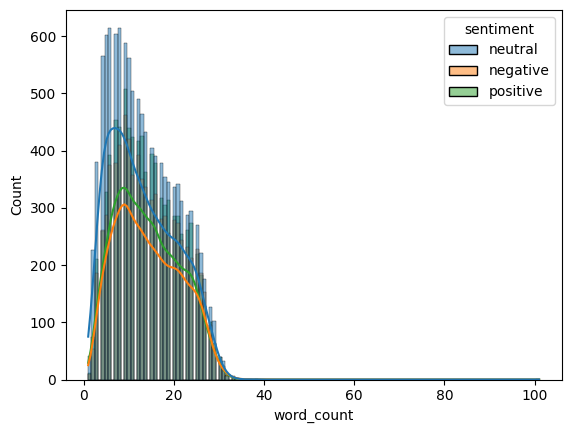

In [ ]:
sns.histplot(data = tweets_data , x = 'word_count', hue = 'sentiment', kde = True)

Other way to visualise the info using a box plot to allow the viewing of the inter-quartiale range and the median of tweets of different catagories

<Axes: ylabel='word_count'>

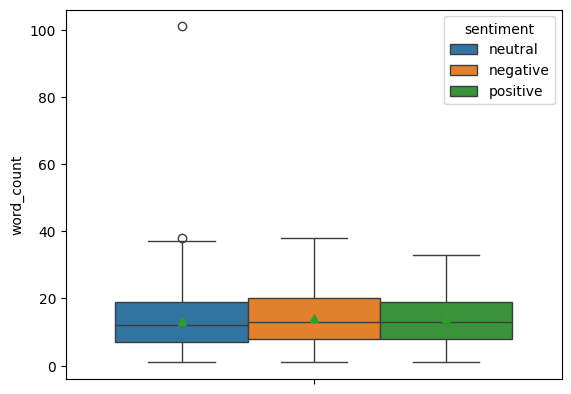

In [ ]:
sns.boxplot(data = tweets_data, y = 'word_count', hue = 'sentiment', showmeans = True)

# Cleaning and Preproccesing Text Phase

### Get rid of StopWords from our text

In [ ]:
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Normalise or Standardise the data

In [ ]:
import string

def custom_normalisation(input_data):

    # Convert to lowercase
    lowercase = tf.strings.lower(input_data)

    # Remove URLs
    stripped_urls = tf.strings.regex_replace(lowercase, r"https?://\S+|www\.\S+", "")

    # Remove email addresses
    stripped_symbol = tf.strings.regex_replace(stripped_urls, "\S*@\S*\s?", "")

    # Remove text in angular brackets (usually HTML tags)
    stripped_brackets = tf.strings.regex_replace(stripped_symbol, "<.*?>+", "")

    # Remove any square brackets and leave the text within square brackets
    stripped_brackets = tf.strings.regex_replace(stripped_brackets, "\[|\]", "")

    # Matches alphanumeric characters with digits and remove those
    stripped_digits = tf.strings.regex_replace(stripped_brackets, "\w*\d\w*", "")

    # Remove stopwords
    stripped_stopwords = tf.strings.regex_replace(stripped_digits, r"\b(?:{})\b".format("|".join(stop_words)), "")

    # Replace multiple whitespaces with a single whitespace
    stripped_whitespace_chars = tf.strings.regex_replace(stripped_stopwords, "\s+", " ")

    # Remove non-alphabet characters
    return tf.strings.regex_replace(stripped_whitespace_chars ,r"[^a-zA-Z\s]+" ,"")

The above function will be applied on all the text data to clean it up before it is used for the sentiment analysis model training.

Here is an example of how the data will look like after it is cleaned.

First take a random tweet's text data

In [ ]:
tweets_data['text'][10]

' as much as i love to be hopeful, i reckon the chances are minimal =P i`m never gonna get my cake and stuff'

Then apply the function to it.

In [ ]:
custom_normalisation(tweets_data['text'][10]).numpy()

b' much love hopeful reckon chances minimal p  never gonna get cake stuff'

As shown above all unnessecary text that doesnot contribute or affect the text sentiment such as:

* Digits
* Brackets
* Stopwords
* Punctuations
* Emails
* URLs

are removed.

Apply the normalisation of all the texts in the dataframe

In [ ]:
tweets_data['cleaned_text'] = tweets_data['text'].apply(custom_normalisation)

tweets_data.sample(10)

,text,sentiment,word_count,cleaned_text
22012,Wish someone would by my 90mm Mamiya MF lens. ...,neutral,12,tf.Tensor(b'wish someone would mamiya mf lens ...
7129,No I haven`t made my page yet. Had to work,neutral,12,"tf.Tensor(b' made page yet work', shape=(), d..."
18683,Welll my folkiesss(; im offf to dream land;wor...,neutral,19,tf.Tensor(b'welll folkiesss im offf dream land...
12660,"When I start cloggin up my own Twitter feed, i...",neutral,29,tf.Tensor(b' start cloggin twitter feed time ...
24849,i think i`ll be home more than i want to be n...,positive,22,tf.Tensor(b' think home want next week work ...
22267,i finished new moon in 1 day all up. maybe le...,neutral,23,tf.Tensor(b' finished new moon day maybe less...
15161,Great day. And another one awaits,positive,6,"tf.Tensor(b'great day another one awaits', sha..."
16071,_wx Did you see the color of the sky and how i...,negative,23,tf.Tensor(b'wx see color sky looks philly yell...
1933,"july 8th flight gets in, my mate here is on a...",neutral,18,tf.Tensor(b' july flight gets mate goin hm ea...
24175,jen! we havent talked in like 3 days!,negative,8,"tf.Tensor(b'jen havent talked like days', shap..."


Convert the tensor format of the cleaned_text to strings

In [ ]:
def tensor_to_string(tensor):
  return tensor.numpy().decode('utf-8') # Assuming that the encoding is UTF-8

tweets_data['cleaned_text'] = tweets_data['cleaned_text'].apply(tensor_to_string)

tweets_data

,text,sentiment,word_count,cleaned_text
0,"I`d have responded, if I were going",neutral,8,responded going
1,Sooo SAD I will miss you here in San Diego!!!,negative,11,sooo sad miss san diego
2,my boss is bullying me...,negative,5,boss bullying
3,what interview! leave me alone,negative,6,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",negative,15,sons put releases already bought
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,negative,18,wish could come see u denver husband lost job...
27477,I`ve wondered about rake to. The client has ...,negative,26,wondered rake client made clear net force...
27478,Yay good for both of you. Enjoy the break - y...,positive,24,yay good enjoy break probably need hectic w...
27479,But it was worth it ****.,positive,8,worth


### Visualise the tweets of different sentiment labels usig WordCloud

WordCloud is useful library that presents words from the text data in different sizes based on the word frequency of occurance.

Using this library, the ability to find keywords that might influence the sentiment of a text become more apparent and helps in understanding the correlation of those keywords to certain sentiment label.



1. **Positive Sentiment**

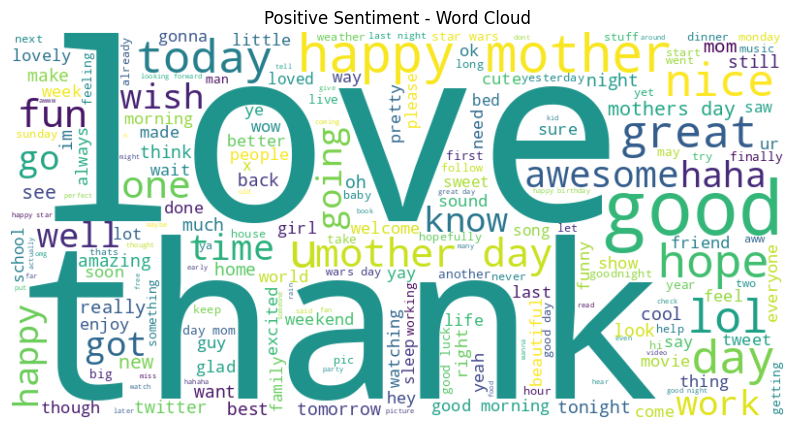

In [ ]:
# Extract texts from positive sentiment tweets
positive_tweets = tweets_data[tweets_data['sentiment'] == 'positive' ]['cleaned_text']

# Concate all positive sentiment text into one string
positive_text = " ".join(positive_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(positive_text)

# Plot the WordCloud
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Positive Sentiment - Word Cloud")
plt.show()

2. **Neutral Sentiment**

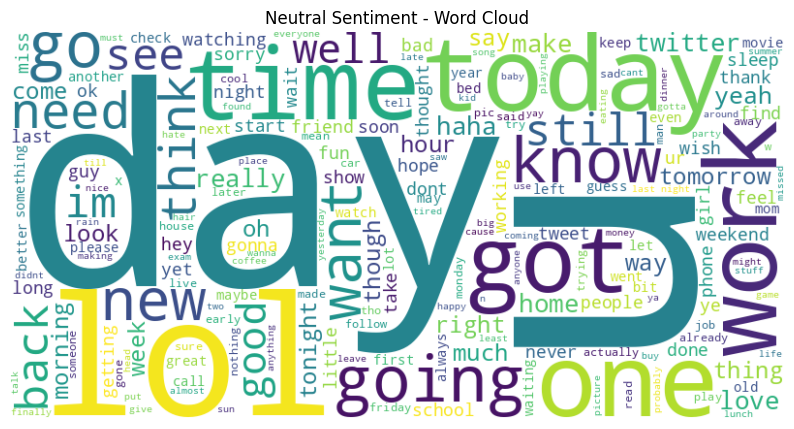

In [ ]:
# Extract texts from neutral sentiment tweets
neutral_tweets = tweets_data[tweets_data['sentiment'] == 'neutral' ]['cleaned_text']

# Concate all positive sentiment text into one string
neutral_text = " ".join(neutral_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(neutral_text)

# Plot the WordCloud
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Neutral Sentiment - Word Cloud")
plt.show()

3. **Negative Sentiment**

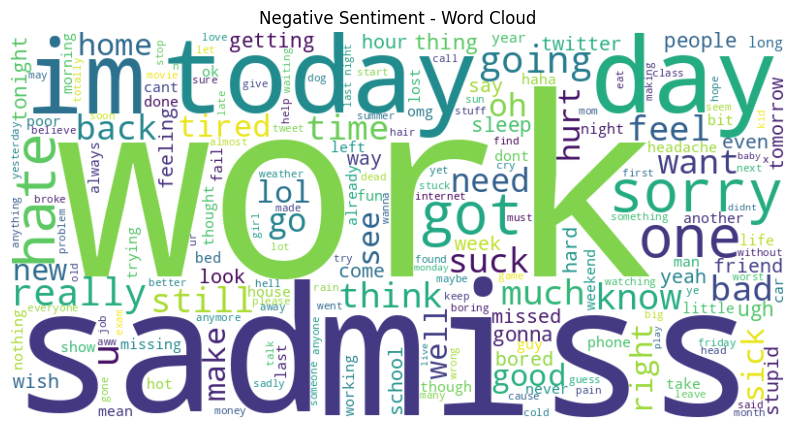

In [ ]:
# Extract texts from negative sentiment tweets
negative_tweets = tweets_data[tweets_data['sentiment'] == 'negative' ]['cleaned_text']

# Concate all negative sentiment text into one string
negative_text = " ".join(negative_tweets)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(negative_text)

# Plot the WordCloud
plt.figure(figsize = (10,6))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.title("Negative Sentiment - Word Cloud")
plt.show()

# Data Setup for Model Training Phase

### Spliting the data into training, test, and valdation sets

First convert sentiment labels into numeric values

In [ ]:
tweets_data['sentiment'] = tweets_data['sentiment'].replace({'negative': 0, 'neutral': 1, 'positive': 2})

tweets_data.sample(10)

,text,sentiment,word_count,cleaned_text
13025,boo. i got rained out at the beach.,0,9,boo got rained beach
18001,good good!!,2,3,good good
15236,I`m a jerk... now I can`t go out Dammit F...,0,21,jerk go dammit frank suck bad
9090,Happy Meal - B.O.B. toy http://tinyurl.com/cj...,2,7,happy meal bb toy
21013,**** I lost my Star Trek ring! Starfleet Ac...,1,28,lost star trek ring starfleet academy class r...
1359,oh..keep working on it..you can always make i...,1,12,ohkeep working always make little smaller
26486,oooh that`s clever. I bow to your economic wi...,2,11,oooh clever bow economic wisdom sensei
7006,4th may officially announced as `bad luck day` ..,0,9,may officially announced bad luck day
16671,that was the class I was keen on. Guess I hav...,1,18,class keen guess wait next summer bummer
2607,"thinking of getting new dvds, csi. can`t wait...",1,13,thinking getting new dvds csi wait get laptop


The above step is necessary, since neural network models dont understand categorical data in forms of strings

Then split the data into training, test, and valdiation sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(tweets_data, test_size = 0.2, stratify = tweets_data["sentiment"], random_state = 123)
X_train, X_val = train_test_split(X_train, test_size = 0.1, stratify = X_train["sentiment"], random_state = 123)

X_train.shape, X_val.shape, X_test.shape

((19785, 4), (2199, 4), (5496, 4))

Check that the proportion of tweets between each sentiment across the sets is aproximately close

In [ ]:
X_train['sentiment'].value_counts()

,count
sentiment,
1,8005
2,6178
0,5602


In [ ]:
X_val['sentiment'].value_counts()

,count
sentiment,
1,889
2,687
0,623


In [ ]:
X_test['sentiment'].value_counts()

,count
sentiment,
1,2223
2,1717
0,1556


### Represent the training, test, and validation data using TensorFlow Datasets

TensorFlow Datasets data structure is useful tool to use when it comes to  efficently manage and process large amounts of data.

It also have multiple mechanisms that optimise the training of the model.

In [ ]:
raw_train_ds = tf.data.Dataset.from_tensor_slices(
    (X_train["text"].values, X_train["sentiment"].values)).shuffle(1024).batch(batch_size = 128)

raw_val_ds = tf.data.Dataset.from_tensor_slices(
    (X_val["text"].values, X_val["sentiment"].values)).batch(batch_size = 128)

raw_test_ds = tf.data.Dataset.from_tensor_slices(
    (X_test["text"].values, X_test["sentiment"].values)).batch(batch_size = 128)

len(raw_train_ds), len(raw_val_ds), len(raw_test_ds)

(155, 18, 43)

# Using Count Vectoriser

### Convert text data into numerical vectors

In [ ]:
vocab_size = 30

count_vectoriser = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "count",
)


### Example usage for better understanding

In [ ]:
# list of text documents
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [ ]:
count_vectoriser.adapt(text)

In [ ]:
count_vectoriser.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [ ]:
count_vectoriser(text)

<tf.Tensor: shape=(4, 24), dtype=int64, numpy=
array([[0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0],
       [0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0],
       [0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0]])>

### Apply count vectoriser to the sets

In [ ]:
vocab_size = 10000

count_vectoriser = layers.TextVectorization(
    standardize = custom_normalisation,
    max_tokens = vocab_size,
    output_mode = "count",
    ngrams = (1, 2)
)



Next call adapt to fit the state of the preprocessing layer to the dataset. this step is essintial since it allow the model to build an index of strings to integers.

In [ ]:
#Make text-only data without labels

train_text = raw_train_ds.map(lambda x, y: x)

count_vectoriser.adapt(train_text)

Next Create a helper function to make sure that vector is in the correct format that can be fed into  our model

In [ ]:
def vectorise_text(text, label):

  text = tf.expand_dims(text, -1)
  return count_vectoriser(text), label

example usage

In [ ]:
import sys

np.set_printoptions(threshold = sys.maxsize)

class_names = ['negative', 'neutral', 'positive']
text_batch, label_batch = next(iter(raw_train_ds))
first_tweet, first_label = text_batch[0], label_batch[0]

print("Tweet:", first_tweet)
print("Label:", class_names[first_label])
print("Vectorized tweet:", vectorise_text(first_tweet, first_label))

Tweet: tf.Tensor(b'Mother`s Day Wishes from google... Pretty & beautiful flowers on google logo  http://www.google.co.in/', shape=(), dtype=string)
Label: positive
Vectorized tweet: (<tf.Tensor: shape=(1, 10000), dtype=int64, numpy=
array([[7, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0

In [ ]:
count_vectoriser.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

### Final preproccessing step

applying Textvectroization layer that was created in the above to the train, val, and test data

In [ ]:
train_ds = raw_train_ds.map(vectorise_text)
val_ds = raw_val_ds.map(vectorise_text)
test_ds = raw_test_ds.map(vectorise_text)

# Model Creation and Training Phase


### setup optimisation for the data loading

storing the data in a cache to prevent the constant retriving of data from the disk as well as prefetching the data so the elements will be prefetched ahead of the time they're needed to train the model. finally i will Autotune the number of elements to prefetch

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

### Create a simple dense neural network

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation = 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(32, activation = 'tanh'),
    layers.Dropout(0.1),
    layers.Dense(3)
])

dnn_model.compile(optimizers.Adam(learning_rate = 0.0001) ,
            loss = losses.SparseCategoricalCrossentropy(from_logits = True),
            metrics = ["accuracy"])

input_shape = (None, 10000)

dnn_model.build(input_shape)

dnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │         640,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 642,243 (2.45 MB)

 Trainable params: 642,243 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Train Model

In [ ]:
history = dnn_model.fit(
    train_ds,
    epochs = 10,
    validation_data = val_ds)

Epoch 1/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 27s 151ms/step - accuracy: 0.4172 - loss: 1.0829 - val_accuracy: 0.5307 - val_loss: 1.0276
Epoch 2/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5586 - loss: 1.0005 - val_accuracy: 0.6103 - val_loss: 0.9458
Epoch 3/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6527 - loss: 0.8967 - val_accuracy: 0.6508 - val_loss: 0.8692
Epoch 4/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7127 - loss: 0.7961 - val_accuracy: 0.6685 - val_loss: 0.8142
Epoch 5/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7415 - loss: 0.7163 - val_accuracy: 0.6826 - val_loss: 0.7803
Epoch 6/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7650 - loss: 0.6494 - val_accuracy: 0.6894 - val_loss: 0.7624
Epoch 7/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7812 - loss: 0.5997 - val_accuracy: 0.6903 - val_loss: 0.7564
Epoch 8/10
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7975 - loss: 0.5564 - val_accuracy:

Evalute model

In [ ]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6782 - loss: 0.7816
Loss:  0.7958897948265076
Accuracy:  0.6783115267753601


Accuracy and Loss are plotted wrt epochs

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
history_dict

{'accuracy': [0.46014657616615295,
  0.5753348469734192,
  0.6596411466598511,
  0.7104371786117554,
  0.7410159111022949,
  0.7653778195381165,
  0.7839272022247314,
  0.7994440197944641,
  0.8153146505355835,
  0.8282537460327148],
 'loss': [1.0663646459579468,
  0.9798226356506348,
  0.8759009838104248,
  0.7799773216247559,
  0.7036391496658325,
  0.6411451101303101,
  0.5915878415107727,
  0.5493990778923035,
  0.512814998626709,
  0.4805804491043091],
 'val_accuracy': [0.5306957960128784,
  0.6102774143218994,
  0.6507503390312195,
  0.668485701084137,
  0.6825829744338989,
  0.6894042491912842,
  0.6903137564659119,
  0.6907685399055481,
  0.6921327710151672,
  0.6903137564659119],
 'val_loss': [1.027642011642456,
  0.9458249807357788,
  0.8691923022270203,
  0.8142403960227966,
  0.7803412675857544,
  0.7624228596687317,
  0.7563686966896057,
  0.7580795288085938,
  0.7652870416641235,
  0.7775101661682129]}

visulaize the model training

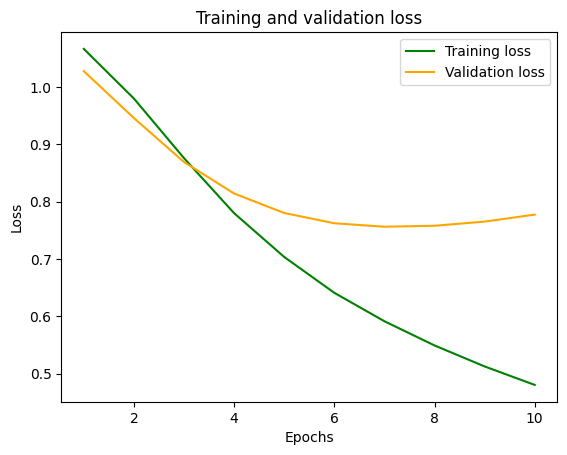

In [ ]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


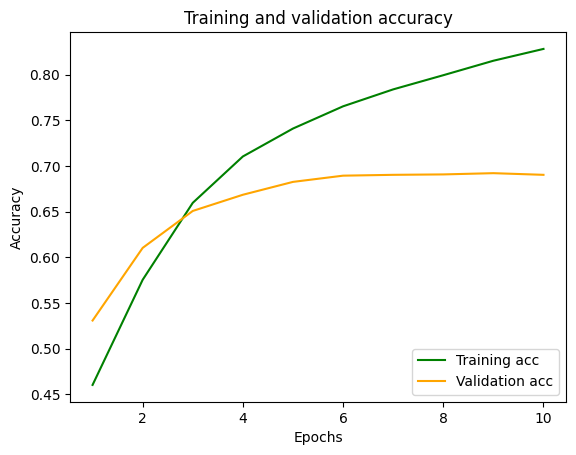

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

### Export the model and test it with raw data

In [ ]:
export_model = Sequential([
    count_vectoriser,
    dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.0001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
#loss, accuracy = export_model.evaluate(raw_test_ds)
#print(accuracy)
export_model.evaluate(raw_test_ds)


43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6782 - loss: 0.0000e+00


[0.0, 0.0, 0.6783115267753601, 0.6783115267753601]

### create a classfication report for the predictions of the model

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,\
                            classification_report

predictions = export_model.predict(X_test['text'].values)
y_pred = np.argmax(predictions, axis = 1)
y_test = X_test['sentiment']

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)

report = classification_report(y_test, y_pred)

print(report)

print("-------------------------")

print("Accuracy:",accuracy)

172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step
              precision    recall  f1-score   support

           0       0.70      0.60      0.65      1556
           1       0.63      0.70      0.67      2223
           2       0.73      0.71      0.72      1717

    accuracy                           0.68      5496
   macro avg       0.69      0.67      0.68      5496
weighted avg       0.68      0.68      0.68      5496

-------------------------
Accuracy: 0.6783114992721979


# Using TF-IDF Vectoriser instead of Count vectoriser

try it on a sample of the text to understand how it works

In [ ]:
vocab_size = 30

tfidf_vectoriser = layers.TextVectorization(
    standardize = "lower_and_strip_punctuation",
    max_tokens = vocab_size,
    output_mode = "tf_idf",
)

In [ ]:
text = ["Malcolm is an amazing painter. Malcolm also loves watching cricket",
        "Dean cooks well",
        "Malcolm is a decent footballer too",
        "Chris is a teacher, he is quite experienced in teaching"]

In [ ]:
tfidf_vectoriser.adapt(text)

In [ ]:
tfidf_vectoriser.get_vocabulary()

['[UNK]',
 'is',
 'malcolm',
 'a',
 'well',
 'watching',
 'too',
 'teaching',
 'teacher',
 'quite',
 'painter',
 'loves',
 'in',
 'he',
 'footballer',
 'experienced',
 'decent',
 'dean',
 'cricket',
 'cooks',
 'chris',
 'an',
 'amazing',
 'also']

In [ ]:
tfidf_vectoriser(text)

<tf.Tensor: shape=(4, 24), dtype=float32, numpy=
array([[0.        , 0.6931472 , 1.6945957 , 0.        , 0.        ,
        1.0986123 , 0.        , 0.        , 0.        , 0.        ,
        1.0986123 , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.0986123 , 0.        ,
        0.        , 1.0986123 , 1.0986123 , 1.0986123 ],
       [0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.0986123 , 0.        , 1.0986123 ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.6931472 , 0.84729785, 0.84729785, 0.        ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.0986123 ,
        0.        , 1.0986123 , 0.        , 0.        , 0.        ,
        0.        , 0

Apply it to all the training texts

In [ ]:
vocab_size = 10000

tfidf_vectoriser = layers.TextVectorization(
    standardize = custom_normalisation,
    max_tokens = vocab_size,
    output_mode = "tf_idf",
    ngrams = (1, 2)
)

tfidf_vectoriser.adapt(train_text)

check how the vocalabrly look like after TF-IDF

In [ ]:
tfidf_vectoriser.get_vocabulary()

['[UNK]',
 'day',
 'good',
 'get',
 'like',
 'go',
 'today',
 'love',
 'going',
 'work',
 'got',
 'one',
 'time',
 'lol',
 'know',
 'happy',
 'u',
 'really',
 'back',
 'im',
 'see',
 'night',
 'new',
 'home',
 'think',
 'want',
 'well',
 'oh',
 'much',
 'still',
 'thanks',
 'miss',
 'great',
 'last',
 'need',
 'morning',
 'haha',
 'hope',
 'would',
 'feel',
 'fun',
 'tomorrow',
 'sorry',
 'twitter',
 'wish',
 'bad',
 'make',
 'tonight',
 'sad',
 'right',
 'week',
 'yeah',
 'nice',
 'way',
 'mother',
 'gonna',
 'though',
 'better',
 'sleep',
 'could',
 'weekend',
 'come',
 'next',
 'people',
 'bed',
 'getting',
 'mothers',
 'wait',
 'watching',
 'mother day',
 'hate',
 'days',
 'say',
 'awesome',
 'thing',
 'school',
 'dont',
 'even',
 'mom',
 'soon',
 'yes',
 'long',
 'little',
 'show',
 'best',
 'working',
 'sure',
 'never',
 'ok',
 'thank',
 'done',
 'mothers day',
 'tired',
 'hey',
 'cool',
 'feeling',
 'take',
 'cant',
 'happy mother',
 'everyone',
 'look',
 'first',
 'please',
 'l

setup the same helper function used in the count vectoriser approach

In [ ]:
def vectorise_text(text, label):

  text = tf.expand_dims(text, -1)
  return tfidf_vectoriser(text), label

setup the three data sets  

In [ ]:
train_ds = raw_train_ds.map(vectorise_text)
val_ds = raw_val_ds.map(vectorise_text)
test_ds = raw_test_ds.map(vectorise_text)

optimise for dataloading again

In [ ]:
Autotune = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = Autotune)
val_ds = val_ds.cache().prefetch(buffer_size = Autotune)
test_ds = test_ds.cache().prefetch(buffer_size = Autotune)

## setup the same model as before

In [ ]:
dnn_model = Sequential([
    layers.Dense(64, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(32, activation = "tanh"),
    layers.Dropout(0.1),
    layers.Dense(3)
])

dnn_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

history = dnn_model.fit(
    train_ds,
    epochs = 40,
    validation_data = val_ds
)

Epoch 1/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 26s 140ms/step - accuracy: 0.3579 - loss: 1.1450 - val_accuracy: 0.3706 - val_loss: 1.1035
Epoch 2/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.3712 - loss: 1.1092 - val_accuracy: 0.3906 - val_loss: 1.0853
Epoch 3/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3999 - loss: 1.0904 - val_accuracy: 0.4134 - val_loss: 1.0698
Epoch 4/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4308 - loss: 1.0688 - val_accuracy: 0.4434 - val_loss: 1.0551
Epoch 5/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4553 - loss: 1.0523 - val_accuracy: 0.4666 - val_loss: 1.0407
Epoch 6/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4842 - loss: 1.0303 - val_accuracy: 0.4879 - val_loss: 1.0264
Epoch 7/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5072 - loss: 1.0115 - val_accuracy: 0.5061 - val_loss: 1.0124
Epoch 8/40
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5299 - loss: 0.9918 - val_accuracy

Evalute the model

In [ ]:
loss, accuracy = dnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.6658 - loss: 0.7795
Loss:  0.7922264933586121
Accuracy:  0.6646652221679688


chart the training and validation data losses

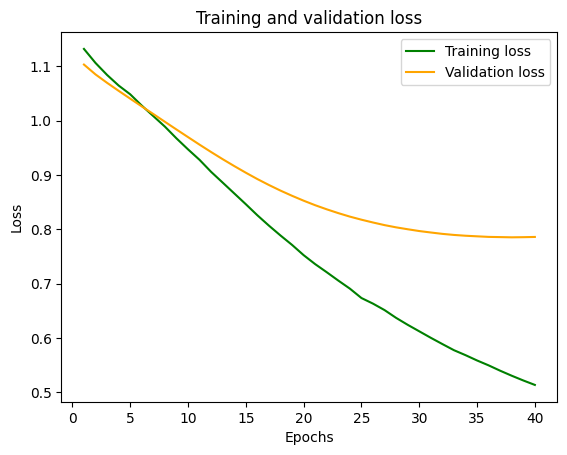

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


as shown in the graph the model is overfitting since the loss flattens out but the training loss contunies to fall

chart the  accuracy on the train and validation data

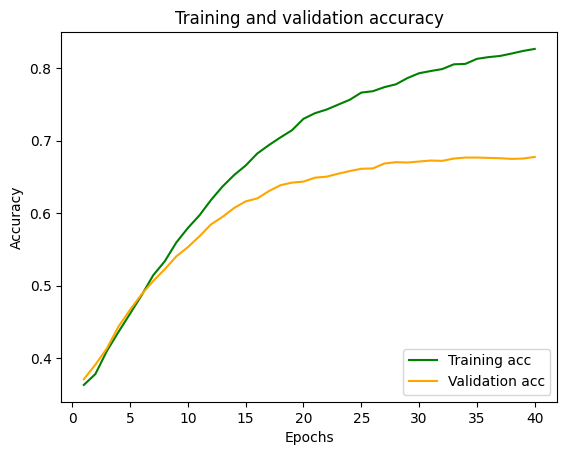

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()


the overfitting is shown here as well since the training accuracy climbs through training but the validation accuracy flattens out

 ### including the pre-proccessing step as a part of the model itself

In [ ]:
export_model = Sequential([
    tfidf_vectoriser,
    dnn_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = optimizers.Adam(learning_rate = 0.00001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
loss , loss1 , accuracy, accuracy1 = export_model.evaluate(raw_test_ds)
#print(accuracy)
export_model.evaluate(raw_test_ds)
print(export_model.metrics_names)

43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6658 - loss: 0.0000e+00
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6658 - loss: 0.0000e+00
['loss', 'loss', 'compile_metrics', 'compile_metrics']


#Using and Generating Embeddings on the input texts

instead of using count or TF-IDF vectors, generating embeddings is a different approach.

Embeddings are a dense vector represenation of texts that capture the sementics and relationships between the words

First setup the vectorised layer to produce integer sequences to represent words

In [ ]:
vocab_size = 10000
sequence_length = 250

vectoriser_layer = layers.TextVectorization(
    standardize = custom_normalisation,
    max_tokens = vocab_size,
    output_mode = "int",
    output_sequence_length = sequence_length
)

Build up the vocabulary

In [ ]:
train_text = raw_train_ds.map(lambda x, y: x)
vectoriser_layer.adapt(train_text)


setup the helper function

In [ ]:
def vectorise_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectoriser_layer(text), label

use the helper function to pre-process the sets

In [ ]:
train_ds = raw_train_ds.map(vectorise_text)
val_ds = raw_val_ds.map(vectorise_text)
test_ds = raw_test_ds.map(vectorise_text)

setup optimisation for the data loading as well

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size = AUTOTUNE)

this time inturoduce additional configuration options for the neural network training such as callbacks

In [ ]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        patience = 3,
        monitor = "val_accuracy"
    ),

    keras.callbacks.ReduceLROnPlateau(
        patience = 1,
        factor = 0.1,
    )
]

 setup the same model arch. with the embedding layer and GlobalAveragePooling1D layer

In [ ]:
embedding_dim = 64

model = Sequential([
  layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim),
  layers.Dropout(0.2),
  layers.GlobalAveragePooling1D(),
  layers.Dense(64, activation = "tanh"),
  layers.Dropout(0.1),
  layers.Dense(32, activation = "tanh"),
  layers.Dropout(0.1),
  layers.Dense(3)]
)

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

the first layer is the embeddig layer which will accept the input from the vectorised layer and genereate embedding our data.

this is a trainable layer.

the GlobalAveragePooling1D layer compresses the the output of the embeddinng layer into a 2-D tensor which helps in reducing paramaters and mitigates overfitting.

configure the model, training parameters and start training

In [ ]:
model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = True),
               metrics = ["accuracy"])

history = model.fit(
    train_ds,
    epochs = 50,
    validation_data = val_ds,
    callbacks = callbacks_list
)

Epoch 1/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.4011 - loss: 1.0900 - val_accuracy: 0.4043 - val_loss: 1.0870 - learning_rate: 0.0010
Epoch 2/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3963 - loss: 1.0889 - val_accuracy: 0.4043 - val_loss: 1.0844 - learning_rate: 0.0010
Epoch 3/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4005 - loss: 1.0859 - val_accuracy: 0.4102 - val_loss: 1.0789 - learning_rate: 0.0010
Epoch 4/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4195 - loss: 1.0802 - val_accuracy: 0.4084 - val_loss: 1.0625 - learning_rate: 0.0010
Epoch 5/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4124 - loss: 1.0698 - val_accuracy: 0.3124 - val_loss: 1.1354 - learning_rate: 0.0010
Epoch 6/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4725 - loss: 1.0242 - val_accuracy: 0.4993 - val_loss: 0.9978 - learning_rate: 1.0000e-04
Epoch 7/50
155/155 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5326 - loss: 0.98

Evalute the model

In [ ]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6541 - loss: 0.8108
Loss:  0.8238367438316345
Accuracy:  0.6572052240371704


Graph a line chart showing the training and validation loss over epochs of training

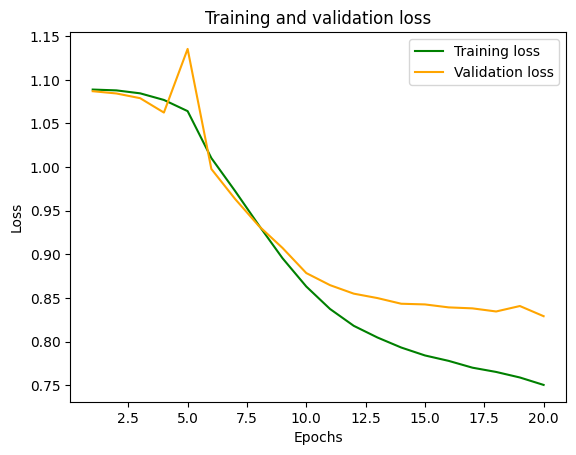

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Graph a line chart showing the training and validation accuracy over the training

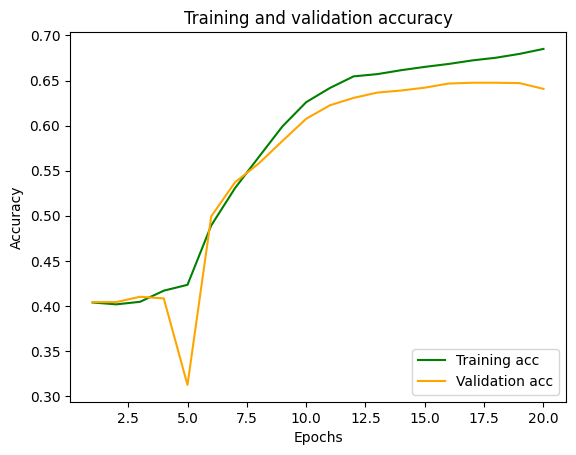

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

 # Training the model but with a simple RNN

uses the same vectorised layer as before as well as the embedding layer

In [ ]:
embedding_dim = 128

rnn_model = Sequential()

rnn_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))

rnn_model.add(layers.SimpleRNN(128, return_sequences = True))

rnn_model.add(layers.GlobalMaxPool1D())

rnn_model.add(layers.Dense(3, activation = "softmax"))

rnn_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = False),
               metrics = ["accuracy"])

history = rnn_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callbacks_list)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.4827 - loss: 1.0093 - val_accuracy: 0.6712 - val_loss: 0.7837 - learning_rate: 0.0010
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.7054 - loss: 0.7116 - val_accuracy: 0.6921 - val_loss: 0.7349 - learning_rate: 0.0010
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7890 - loss: 0.5576 - val_accuracy: 0.6889 - val_loss: 0.7583 - learning_rate: 0.0010
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 41ms/step - accuracy: 0.8634 - loss: 0.4058 - val_accuracy: 0.6862 - val_loss: 0.8255 - learning_rate: 1.0000e-04
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8734 - loss: 0.3703 - val_accuracy: 0.6849 - val_loss: 0.8167 - learning_rate: 1.0000e-05


Evalute the RNN model

In [ ]:
loss, accuracy = rnn_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6833 - loss: 0.8106
Loss:  0.8103564977645874
Accuracy:  0.6857714653015137


Graph the training and validation loss over the training

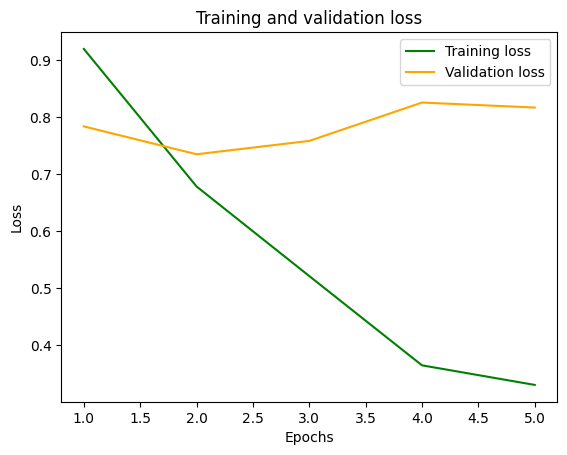

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Graph the training and validation accuracy over the training

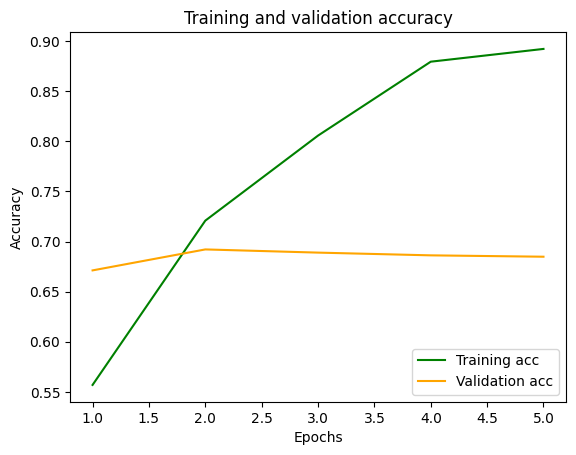

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

# Using LSTM RNN

setup and embedding and GlobalAveragePooling1D layer.

Also used a spatialDropout layer cause it drops 1D features maps instead of indvidual elements which will help mitigate the overfitting shown in the simple RNN

In [ ]:
embedding_dim = 128

lstm_model = Sequential()

lstm_model.add(layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim))

lstm_model.add(layers.SpatialDropout1D(0.25))

lstm_model.add(layers.LSTM(128, dropout = 0.6, return_sequences = True))

lstm_model.add(layers.GlobalMaxPooling1D())

lstm_model.add(layers.Dense(32, activation = "tanh"))
lstm_model.add(layers.Dense(3, activation = "softmax"))

lstm_model.compile(optimizer = optimizers.Adam(learning_rate = 0.001),
               loss = losses.SparseCategoricalCrossentropy(from_logits = False),
               metrics = ["accuracy"])

history = lstm_model.fit(
    train_ds,
    epochs = 20,
    validation_data = val_ds, callbacks = callbacks_list)

Epoch 1/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.4445 - loss: 1.0375 - val_accuracy: 0.6689 - val_loss: 0.7767 - learning_rate: 0.0010
Epoch 2/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.6878 - loss: 0.7455 - val_accuracy: 0.6894 - val_loss: 0.7447 - learning_rate: 0.0010
Epoch 3/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7443 - loss: 0.6474 - val_accuracy: 0.6953 - val_loss: 0.7367 - learning_rate: 0.0010
Epoch 4/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7755 - loss: 0.5794 - val_accuracy: 0.6985 - val_loss: 0.7545 - learning_rate: 0.0010
Epoch 5/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8064 - loss: 0.5113 - val_accuracy: 0.7021 - val_loss: 0.7661 - learning_rate: 1.0000e-04
Epoch 6/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8161 - loss: 0.4999 - val_accuracy: 0.6980 - val_loss: 0.7694 - learning_rate: 1.0000e-05
Epoch 7/20
155/155 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8129 - 

Evalute the model

In [ ]:
loss, accuracy = lstm_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6981 - loss: 0.7899
Loss:  0.795632004737854
Accuracy:  0.6970524191856384


Graph the training and validation loss over the training

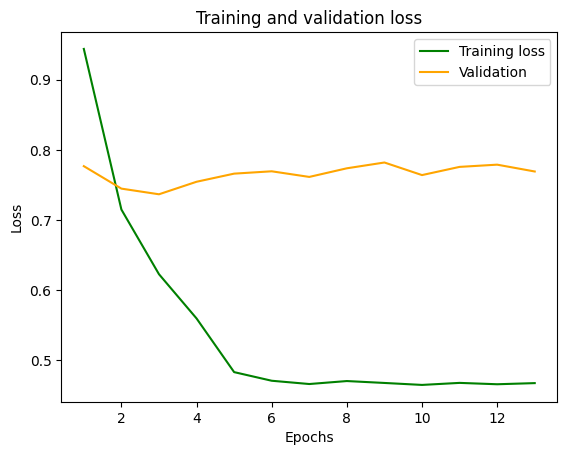

In [ ]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, color = 'Green', label = 'Training loss')
plt.plot(epochs, val_loss, color = "orange", label = "Validation")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

Graph the training and validation accuracy over training

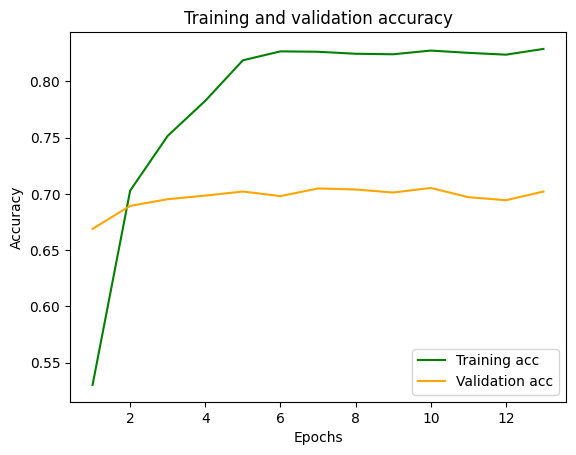

In [ ]:
plt.plot(epochs, acc, color = "green", label = "Training acc")
plt.plot(epochs, val_acc, color = "orange", label = "Validation acc")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = "lower right")

plt.show()

# Save the best preformance model

as shown in the previous sections the LSTM model is the best preforming model

first export the model with the vectorised layer as a part of the model. this will allow the feeding of raw inputs to the model and get predictions without the need for the preproccessing of the inputs

In [ ]:
export_model = Sequential([
    vectoriser_layer,
    lstm_model
])

export_model.compile(
    loss = losses.SparseCategoricalCrossentropy(from_logits = False),
    optimizer = optimizers.Adam(learning_rate = 0.001),
    metrics = ["accuracy"]
)

# Test it with `raw_test_ds`, which yields raw strings
export_model.evaluate(raw_test_ds)


43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6868 - loss: 0.0000e+00


[0.0, 0.0, 0.6945050954818726, 0.6945050954818726]

# Use the saved model for predictions on some examples

In [ ]:
examples = [
  "this experience has been the worst, want my money back",
  "this AI related article is very good",
  "The movie was average" ]

export_model.predict(tf.constant(examples))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[0.9703975 , 0.02725939, 0.0023431 ],
       [0.01144002, 0.11035107, 0.87820894],
       [0.26661646, 0.6974068 , 0.03597669]], dtype=float32)

as shown in the output, it is specified in terms of probability scores for each possible class and the class with the highest probability score will be the predicted label of the model

use np.argmax to get the highest probabilty score

In [ ]:
np.argmax(export_model.predict(tf.constant(examples)), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([0, 2, 1])

as shown in the output the first example belongs to negative hence 0 , the second belongs to positive hence 2, and the third belongs to neutral hence 1

run predictions on the data and get a classfication report

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

predictions = export_model.predict(X_test["text"].values)
y_pred = np.argmax(predictions, axis = 1)

y_test = X_test["sentiment"]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average = None)
precision = precision_score(y_test, y_pred, average = None)
recall = recall_score(y_test, y_pred, average = None)

# Get Classification Report
report = classification_report(y_test, y_pred)

# Print the report
print(report)

172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.71      0.62      0.66      1556
           1       0.64      0.72      0.68      2223
           2       0.75      0.72      0.73      1717

    accuracy                           0.69      5496
   macro avg       0.70      0.69      0.69      5496
weighted avg       0.70      0.69      0.69      5496



Serializing the model out to disk

In [ ]:
lstm_model.save("sentiment_predictor.keras")

Reloading the model

In [ ]:
# loading a saved model
loaded_model = models.load_model("sentiment_predictor.keras")

# evalute the loaded model to make sure it is the same model
loss, accuracy = loaded_model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6912 - loss: 0.7874
Loss:  0.7875593900680542
Accuracy:  0.6934133768081665
